#### Выполнил: Хамдамов Сыймык

группа: МКНДН251

# Задача 1: Попарные углы (1 балл)

Даны набор векторов. Без использования циклов в Python найдите номера двух различных векторов, угол между которыми - минимален. Максимум 3 строки, соответсвующие форматированию jupyter_black.


In [ ]:
import numpy as np

x = np.array(
    [
        [-1.05247805, 0.0813231, 0.94708268, -0.53371674],
        [0.01359646, -1.43838044, 1.01326978, -0.38062482],
        [0.30563645, 1.18997822, 0.48149476, 0.83524308],
        [1.22609704, 1.72169283, -0.21137761, -1.21598295],
        [0.6397264, -1.24751009, 0.03137696, 0.55576899],
        [1.55630085, 1.2840827, -0.52525765, 2.4523538],
        [-1.70632707, 0.45006017, -1.04214031, -1.47674443],
        [-0.51870141, -0.01755243, 1.95102122, 0.36809772],
        [-0.97629927, 0.35430853, -0.63895086, -0.2467184],
        [-0.51120513, -0.33014789, -1.45017724, -0.02398285],
    ]
)
N = np.linalg.norm(x, axis=1, keepdims=True)
S = (x @ x.T) / (N * N.T) - 2 * np.eye(x.shape[0])
i, j = np.unravel_index(np.argmax(S), S.shape)

print(i, j)

assert (i, j) == (6, 8) or (i, j) == (8, 6), "Wrong Answer"

6 8


# Задача 2: Cвертка (1 балл)
Реализуйте двумерную свертку при помощи numpy без использования циклов в python.
Максимум 4 строки,  соответсвующие форматированию jupyter_black.

![](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif)



In [ ]:
def conv2d_valid(x, k):
    k = np.flip(k, (0, 1))
    W = np.lib.stride_tricks.sliding_window_view(x, k.shape)
    return (W * k).sum(axis=(-2, -1))
# пример:
# x = np.array([[12,21,32],[43,15,6],[7,82,9]])
# k = np.array([[1,2],[3,4]])
# print(conv2d_valid(x, k))

# Задача 3: Брахистохрона (1 балл)

В классе мы находили брахистохрону через параметризацию соответсвубщей дуги циклоиды. Ключевым здесь было то, что мы заранее знали, в каком виде искать ответ, что, к сожалению, далеко не всегда случается в реальной жизни. В этой задаче вам нужно будет построить кусочно-динейное приближение брахистохроны, не пользуясь явными формулами для ее формы. Другими словами, напишите функционал, который под данным высотам точек вычисляет время спуска, -- и минимизируйте этот функционал средствами scipy.

---
##  Брахистохрона
Задача о нахождении кривой наискорейшего спуска, или *брахистохроны*, состоит в том, чтобы найти такую форму горки, чтобы время скатывания  по ней тела без трения было минимальным.

![SegmentLocal](https://upload.wikimedia.org/wikipedia/commons/6/63/Brachistochrone.gif)

Известно, что решение этой задачи - трансцедентная кривая, называемая [циклоидой](https://ru.wikipedia.org/wiki/%D0%A6%D0%B8%D0%BA%D0%BB%D0%BE%D0%B8%D0%B4%D0%B0). Кроме того, что это кривая минимизирует время спуска, она является траекторией точки на границе катящейся окружности, время спуска по этой кривой не зависит от начального положения, а еще маятник в часах имеет циклоидальный ограничитель, благодаря чему частота его колебаний не зависит от амплитуды.

Она была поставлена Иоганном Бернулли в 1696 году. Разные решения предлагали Исаак Ньютон, Якоб Бернулли, Г. В. Лейбниц, Г. Ф. Лопиталь, Э. В. Чирнхаус. Скорее всего, вы уже находили ее на курсе по вариационному исчислению, минимизируя значение какого-то там интеграла. Здесь же предлагается приблизить брахстохрону при помощи функционала scipy.optimize.

Самый простой способ построить брахистохрону - параметризовать ее (вывод формул из закона сохранения энергии можно найти [тут](https://en.wikipedia.org/wiki/Brachistochrone_curve#Indirect_method)
$$x = r \theta - r\sin \theta $$
$$y = r - r\cos  \theta$$

Т.е. мы хотим найти такие $\theta$ и $r$, что соответсвущая дуга циклоиды соединяет концы нашей горки.

**Как будем решать такую задачу?**


theta* = 4.051628024117091 r = 2.4787481061778576
T_cycloid = 2.036625890399913 сек


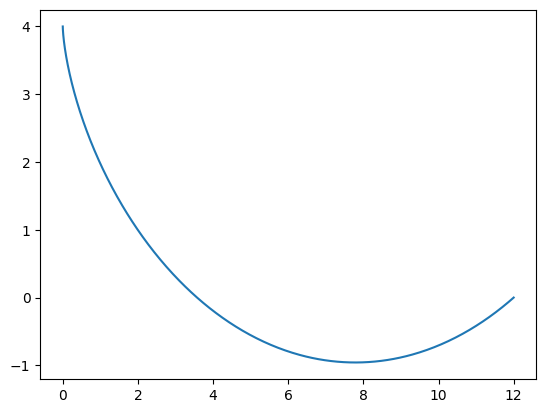

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

HEIGHT = 4
WIDTH = 12

# отрисуем правильный ответ:
fig = plt.figure()
ax = fig.add_subplot(111)

# Находим \theta и r
# Находим \theta из HEIGHT * (\theta - sin \theta)/(1 - cos \theta) = WIDTH
f = lambda th: HEIGHT * (th - np.sin(th)) / (1 - np.cos(th)) - WIDTH
theta_star = optimize.brentq(f, 1e-6, 2*np.pi - 1e-6)
r = HEIGHT / (1 - np.cos(theta_star))

ts = np.linspace(0, theta_star, 600)
g = 9.81
print("theta* =", theta_star, "r =", r)
print("T_cycloid =", np.sqrt(r/g)*theta_star, "сек")


sol_xs = r * (ts - np.sin(ts))
sol_ys = HEIGHT - r * (1 - np.cos(ts))


ax.plot(sol_xs, sol_ys)
fig.canvas.draw()
plt.show(block=False)

In [ ]:
# NB. Паметры горки и правильный ответ находятся выше - вы можете поменять их на свое усмотрение.
NUM_POINTS = 24

dx = WIDTH / (NUM_POINTS - 1)
xs = np.linspace(0, WIDTH, NUM_POINTS)

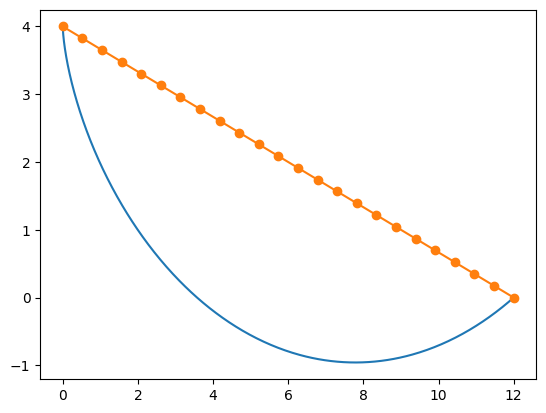

In [ ]:
def draw(ys):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(sol_xs, sol_ys)
    (li,) = ax.plot(xs, ys, marker="o")


# инициализация горку прямой
ys = np.linspace(HEIGHT, 0, NUM_POINTS)
draw(ys)

In [ ]:
g = 9.81

def get_time(ys):
    """
    :param ys: heigths of our points
    :return: total time
    """
    y0 = ys[0]

    if np.any(ys > y0):
        return 1e12

    dy = np.diff(ys)
    m  = dy / dx
    A  = y0 - ys[:-1]
    B  = y0 - ys[1:]

    if np.any(B < 0):
        return 1e12

    s1p2 = np.sqrt(1 + m*m)
    core = np.where(
        np.abs(m) > 1e-12,
        (2.0/m) * (np.sqrt(A) - np.sqrt(B)),
        dx / np.sqrt(np.clip(A, 1e-12, None))
    )
    return np.sum(s1p2 * core) / np.sqrt(2*g)


get_time(ys)

np.float64(2.855686245854129)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.0458796397151486
            Iterations: 57
            Function evaluations: 1315
            Gradient evaluations: 57


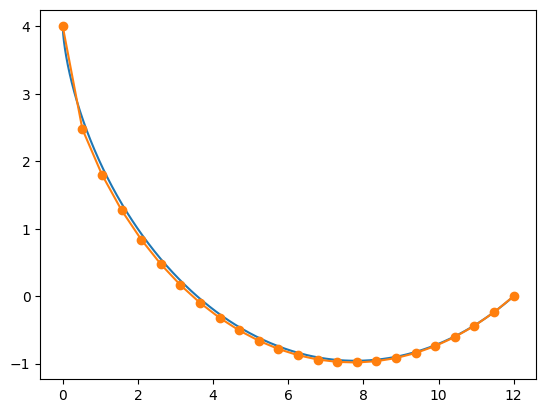

In [ ]:
# Bounds: we can not move the first and the last points
bounds = (
    [(HEIGHT, HEIGHT)]
    + [(-float("inf"), float("inf")) for _ in range(NUM_POINTS - 2)]
    + [(0, 0)]
)

# Run the optimization
from scipy.optimize import minimize

result = minimize(get_time, ys, method="SLSQP", bounds=bounds,
                  options={"maxiter": 2000, "ftol": 1e-12, "disp": True})
draw(result.x)

In [ ]:
get_time(ys), get_time(result.x)

(np.float64(2.855686245854129), np.float64(2.0458796397151486))

# Задача 4. Split.

Реализуйте разбиение датасета на train, test и val при помощи pandas и без использования циклов на Python. Разбиение должно быть стратифицировано по колонкам, данные должны быть перемешаны. Подробно объясните и/или прокомментируйте, почему ваш код делает то, что нужно.

In [ ]:
import pandas as pd

def split_stratified(df, stratify_clumns, train_frac=0.6, val_frac=0.2):

X_train, val, Y_test = split_stratified(df, ["Category", "Survived"])

IndentationError: expected an indented block after function definition on line 3 (ipython-input-2355629732.py, line 9)

In [ ]:
import numpy as np
import pandas as pd

def split_stratified(df, stratify_cols, train_frac=0.6, val_frac=0.2, seed=42):
    """
    делит DataFrame на train/val/test без циклов и с сохранением долей по стратам

    1) внутри каждой страты (группы по `stratify_cols`) берём случайную выборку
       размера ~ train_frac -> это и есть train
    2) из оставшегося (df \ train) снова по стратам берём кусок под val
       с долей пересчитанной относительно остатка: val_frac/(1-train_frac)
    3) всё что не попало в train/val идёт в test
    4) в конце перемешиваем части чтобы убрать порядок исходного df


    - стратификация: выборка делается для кадой группы отдельно (groupby.sample) поэтому пропорции классов/категорий сохраняются
    - воспроизводимость: фиксируем случайное зерно (seed)
    - части непересекаются: на втором шаге выбираем из `remain` а не из исходного df
    """
    # группируем по стратам
    # group_keys=False чтобы не добавлять уровень
    # индекса с названиями групп при конкатенации результатов
    g = df.groupby(stratify_cols, group_keys=False)

    # 1) train из каждой страты берём train_frac случайных строк
    train = g.sample(frac=train_frac, random_state=seed)

    # 2) остаток после train
    remain = df.drop(train.index)

    # 3) val из остатка снова по стратам; долю пересчитываем от остатка
    val = remain.groupby(stratify_cols, group_keys=False).sample(
        frac=val_frac / (1 - train_frac), random_state=seed + 1
    )

    # 4) test просто всё что не вошло в val из остатка
    test = remain.drop(val.index)

    # 5) финальное перемешивание чтобы разорвать исходный порядок
    train = train.sample(frac=1.0, random_state=seed    ).reset_index(drop=True)
    val   = val.sample(  frac=1.0, random_state=seed + 1).reset_index(drop=True)
    test  = test.sample( frac=1.0, random_state=seed + 2).reset_index(drop=True)

    return train, val, test


# Задача 5. Паром (1 балл).

Получите accuracy > 0.89 на тестовом датасете. Можно пользоваться любым классификатором **из sklearn**. Ансамблями пользоваться можно.

### XtreemeGradientBoosting и нейронные сети запрещены.


## `Анализ данных`

In [ ]:
import pandas as pd

all_data = pd.read_csv(
    "/content/drive/MyDrive/1 семестр HSE DS 2025/ML ФКН (1 семестр 2025 год)/estonia-passenger-list.csv"
)
all_data.head(5)

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


In [ ]:
all_data["PassengerId"] = all_data["PassengerId"].astype("category")
all_data.describe()

,Age,Survived
count,989.000000,989.000000
mean,44.575329,0.138524
std,17.235146,0.345624
min,0.000000,0.000000
25%,30.000000,0.000000
50%,44.000000,0.000000
75%,59.000000,0.000000
max,87.000000,1.000000


In [ ]:
all_data["Country"].value_counts()

,count
Country,
Sweden,550
Estonia,344
Latvia,28
Finland,16
Russia,14
Norway,9
Germany,8
Denmark,6
Lithuania,4


In [ ]:
anonymized_data = all_data.drop(["Firstname", "Lastname", "PassengerId"], axis=1)
anonymized_data.head(1)

,Country,Sex,Age,Category,Survived
0,Sweden,M,62,P,0


In [ ]:
y = anonymized_data["Survived"]
y.value_counts()

,count
Survived,
0,852
1,137


In [ ]:
anonymized_data[anonymized_data["Country"] == "Russia"]

,Country,Sex,Age,Category,Survived
46,Russia,M,49,P,0
120,Russia,M,25,P,0
396,Russia,F,40,C,0
408,Russia,M,49,P,0
413,Russia,M,24,P,0
531,Russia,M,52,C,0
532,Russia,F,39,C,0
542,Russia,M,25,P,0
685,Russia,F,37,C,0
690,Russia,M,37,P,0


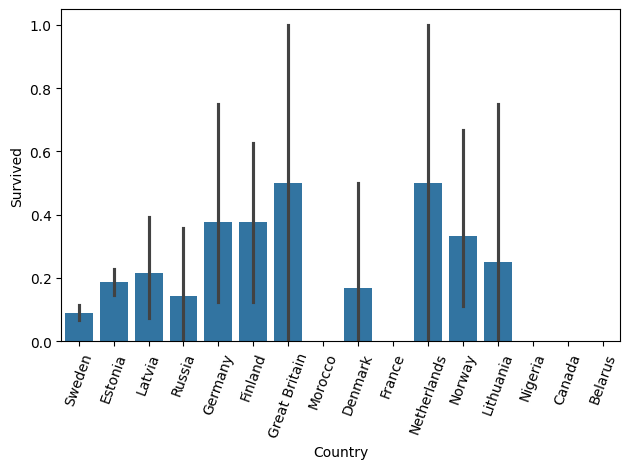

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# нарисуем среднюю выживаемость и дисперсию
sns.barplot(x="Country", y="Survived", data=anonymized_data)

# Поворот  подписей
plt.xticks(rotation=70)
plt.tight_layout()

<Axes: xlabel='Category', ylabel='Survived'>

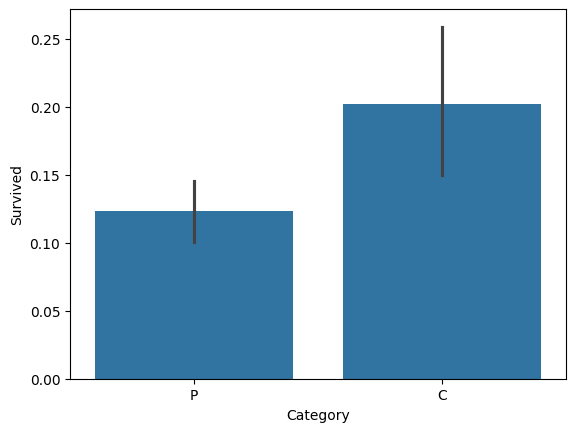

In [ ]:
# Зависит ли выживаемость от категории Пассажиры/Passengers; Команда/Сrew
sns.barplot(x="Category", y="Survived", data=anonymized_data)

In [ ]:
anonymized_data["Category"].value_counts()

,count
Category,
P,796
C,193


А как распределён возраст?

Можно посмотреть встроенными средствами pandas:

<Axes: >

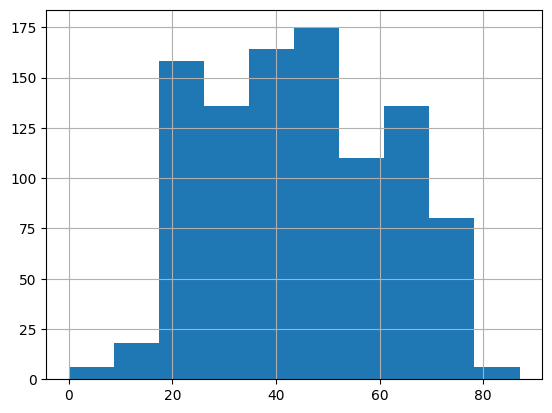

In [ ]:
anonymized_data["Age"].hist()

## Подготовка данных

#### Dummy-coding AKA One-Hot-Encoding

Но чаще всё-таки удобнее кодировать средствами sklearn, увидим ниже.

In [ ]:
countries = pd.get_dummies(anonymized_data["Country"], prefix="c")
countries

,c_Belarus,c_Canada,c_Denmark,c_Estonia,c_Finland,c_France,c_Germany,c_Great Britain,c_Latvia,c_Lithuania,c_Morocco,c_Netherlands,c_Nigeria,c_Norway,c_Russia,c_Sweden
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
985,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
986,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
987,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


Сами разобьём на обучающую и тестовую выборки -- до всех предобработок, это важно!

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

data_train, data_test, y_train, y_test = train_test_split(
    anonymized_data.drop(["Survived"], axis=1),  # X
    anonymized_data["Survived"],  # y
    test_size=0.3,  # доля от всех записей
    random_state=1337,  # зерно
    stratify=anonymized_data["Survived"],  # а это что?
)

# print(data_train.shape, y_train.shape, data_test.shape, y_test.shape)

# np.sum(y_train) / y_train.shape[0], np.sum(y_test) / y_test.shape[0]
# nonames_data.shape, data_train.shape
# y_train, y_test
# y_train.value_counts()

In [ ]:
data_train.head(5)

,Country,Sex,Age,Category
784,Sweden,M,61,P
36,Sweden,M,70,P
194,Sweden,M,43,P
87,Estonia,F,33,C
62,Sweden,F,29,C


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy import sparse as sp


# Не все классификаторы умеют обращаться с категориальными признаками.
def prepare_features_for_logreg(data: pd.DataFrame, cat_encoder=None, real_scaler=None):
    cat_columns = ["Country", "Sex", "Category"]
    real_columns = ["Age"]

    # categorical features
    if cat_encoder is None:
        ohe = OneHotEncoder(handle_unknown="ignore")
        ohe.fit(data[cat_columns])
    else:
        ohe = cat_encoder
    X_cat = ohe.transform(data[cat_columns])
    cat_fnames = ohe.get_feature_names_out(cat_columns)

    # real-valued features
    if real_scaler is None:
        stsc = StandardScaler()
        stsc.fit(data[real_columns])
    else:
        stsc = real_scaler
    X_real = stsc.transform(data[real_columns])
    feature_matrix = sp.hstack([X_cat, X_real])

    return feature_matrix, list(cat_fnames) + real_columns, ohe, stsc


X_train_sparse, fnames_sparse, encoder_sparse, scaler = prepare_features_for_logreg(
    data_train
)
X_test_sparse, _, _, _ = prepare_features_for_logreg(data_test, encoder_sparse, scaler)

X_train_sparse.shape, X_test_sparse.shape
# X_train_sparse.todense()
# X_test_sparse.todense()

((692, 20), (297, 20))

## Log-res


In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

clf_linear = LogisticRegression(
    C=0.99, class_weight="balanced", solver="saga", penalty="l1"
)
clf_linear.fit(X_train_sparse, y_train)

y_pred_train = clf_linear.predict(X_train_sparse)
y_pred_test = clf_linear.predict(X_test_sparse)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))
# clf_linear.coef_

              precision    recall  f1-score   support

           0       0.94      0.69      0.79       596
           1       0.28      0.75      0.41        96

    accuracy                           0.70       692
   macro avg       0.61      0.72      0.60       692
weighted avg       0.85      0.70      0.74       692

              precision    recall  f1-score   support

           0       0.95      0.73      0.82       256
           1       0.31      0.76      0.44        41

    accuracy                           0.73       297
   macro avg       0.63      0.74      0.63       297
weighted avg       0.86      0.73      0.77       297



<Axes: >

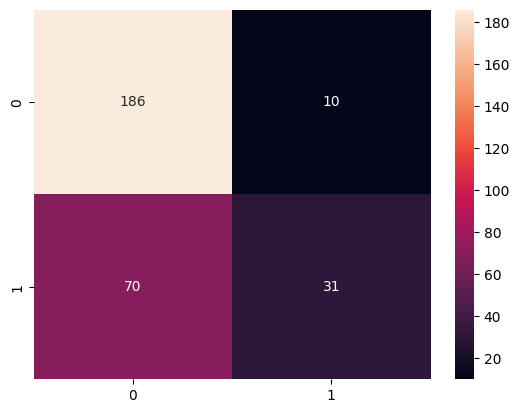

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_test, y_test

sns.heatmap(confusion_matrix(y_pred_test, y_test), annot=True, fmt="g")

Хороший способ проверить, не ерунду ли мы сделали: внимание на **accuracy** и на метрики в разделе **macro-averaged**

In [ ]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy="most_frequent").fit(X_train_sparse, y_train)
y_pred = clf_dummy.predict(X_test_sparse)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       256
           1       0.00      0.00      0.00        41

    accuracy                           0.86       297
   macro avg       0.43      0.50      0.46       297
weighted avg       0.74      0.86      0.80       297



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Подготовим признаки для логических классификаторов -- там обычно можно без разреженных признаков и нормализации

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from scipy import sparse as sp


def prepare_features_for_logic(data: pd.DataFrame, cat_encoder=None):

    cat_columns = ["Country", "Sex", "Category"]
    real_columns = ["Age"]

    # categorical features
    if cat_encoder is None:
        oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
        oe.fit(data[cat_columns])
    else:
        oe = cat_encoder

    X_cat = oe.transform(data[cat_columns])
    mapped_cat_values = oe.categories_
    cat_fnames = cat_columns

    # real-valued features

    # todo: вообще очень часто есть смысл отбросить из обучающей выборки примеры,
    #       значения которых редки (например, выпадающие далеко "за три сигмы")

    X_real = data[real_columns].values
    feature_matrix = np.hstack([X_cat, X_real])  # note: `np` for dense Numpy matrices

    return feature_matrix, list(cat_fnames) + real_columns, oe, mapped_cat_values


X_train_dense, fnames_dense, encoder, mapped_cat_values = prepare_features_for_logic(
    data_train
)
X_test_dense, _, _, _ = prepare_features_for_logic(data_test, encoder)


X_train_dense.shape, X_test_dense.shape

mapped_cat_values
X_train_dense

array([[14.,  1.,  1., 61.],
       [14.,  1.,  1., 70.],
       [14.,  1.,  1., 43.],
       ...,
       [14.,  1.,  0., 36.],
       [14.,  1.,  1., 50.],
       [14.,  0.,  1., 69.]])

In [ ]:
data_train.head(0)

,Country,Sex,Age,Category


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(class_weight="balanced").fit(X_train_dense, y_train)
y_pred = clf.predict(X_test_dense)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       256
           1       0.28      0.46      0.35        41

    accuracy                           0.76       297
   macro avg       0.59      0.64      0.60       297
weighted avg       0.82      0.76      0.78       297



In [ ]:
sum(clf.feature_importances_)

np.float64(1.0)

Но пока мы даже не попытались настроить модели, результаты ничего не значат.

Кстати, смотрите, как можно.


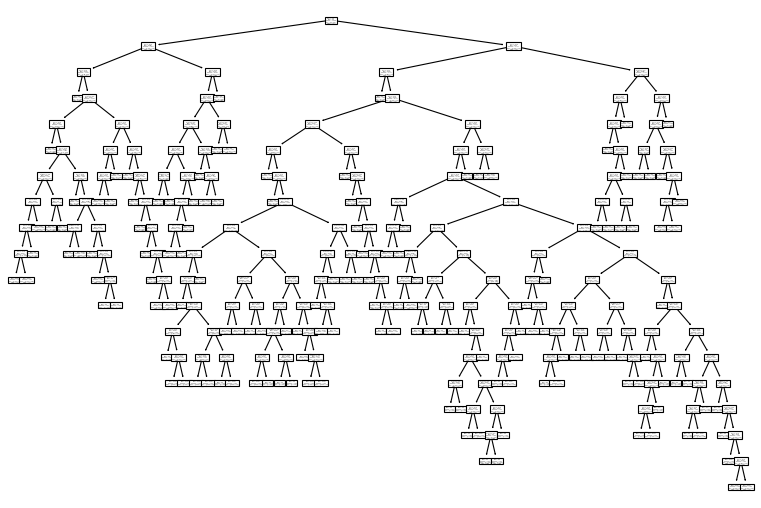

In [ ]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)


plot_tree(
    clf, feature_names=fnames_dense, class_names=["Dead", "Surv"], proportion=True
);

## Познакомились с minimum minimorum,
попробуем получить результаты получше со случайным лесом

Посмотрим на самые важные параметры.

```
class sklearn.ensemble.RandomForestClassifier(

                        n_estimators=100,  
                            Число деревьев.              
                            
                        criterion='gini',
                            Критерий: индекс Джини либо энтропия, может зависеть от вида дерева
                            
                        max_depth=None,
                            Самая, пожалуй, естественная регуляризация -- ограничение глубины дерева
                            
                        min_samples_split=2,
                            Сколько должно попасть в вершину объектов, чтобы её можно было ветвить дальше
                            
                        min_samples_leaf=1,
                            Очень мощный и важный регуляризатор! Сколько минимум объектов должно быть в листе
                            
                        max_features='auto',
                            Среди какого числа признаков выбираем очередное ветвление
                            
                        max_leaf_nodes=None,
                            Хороший регуляризатор -- ограничение на количество листьев; добавляются по убыванию
                            снижения impurity.
                            
                        min_impurity_decrease=0.0,
                            Порог по уменьшению impurity, который запрещает ветвить дерево дальше.
                        
                        bootstrap=True,
                            Если False, обучаем каждое дерево на всём наборе данных.
                            Если True, только на части, размер которой задан в max_samples.
                            
                        n_jobs=None,
                            На сколько job-ов распараллелить.
                            
                        random_state=None,
                            Ну, тут всё понятно: случайный seed, позволяющий воспроизводить результаты.
                        
                        verbose=0,
                            Степень подробности протоколирования хода обучения и всего такого. Обычно 0,1,2.
                            
                        warm_start=False,
                            Это такая возможность переиспользовать обученный ансамбль для последующих задач.
                             
                        max_samples=None
                            Сколько максимум сэмплов брать из датасета для обучения очередного дерева, если bootstrap
                        )
```

In [ ]:
param_grid = {
    "n_estimators": [10, 50, 100],
    "min_samples_leaf": [1, 2, 3, 5],
    "max_samples": [0.3, None],
    "class_weight": ["balanced", "balanced_subsample"],
}
param_grid

{'n_estimators': [10, 50, 100],
 'min_samples_leaf': [1, 2, 3, 5],
 'max_samples': [0.3, None],
 'class_weight': ['balanced', 'balanced_subsample']}

In [ ]:
y_train.shape, y_test.shape, type(y_train)

((692,), (297,), pandas.core.series.Series)

### Упражнение
Зачем нужен KFold? Почему нельзя просто считать метрики на тесте?


In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

kfold = StratifiedKFold(n_splits=3, random_state=100, shuffle=True)

print(y_train.values.mean())

for array1, array2 in kfold.split(X_train_dense, y_train):
    x_train_cv = X_train_dense[array1]
    y_train_cv = np.array(y_train)[list(array1)]

    x_test_cv = X_train_dense[array2]
    y_test_cv = np.array(y_train)[list(array2)]

    print(y_train_cv.mean(), y_test_cv.mean())

0.13872832369942195
0.13882863340563992 0.13852813852813853
0.13882863340563992 0.13852813852813853
0.13852813852813853 0.1391304347826087


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

scores = ["accuracy"]

for score in scores:
    print("# Tuning for %s" % score)
    print()

    clf = GridSearchCV(
        RandomForestClassifier(n_jobs=-1, random_state=100),
        param_grid,
        scoring=score,
        verbose=1,
        cv=3,
    )

    clf.fit(X_train_dense, y_train)

    print("Best params on dev set:")
    print(clf.best_params_)

    print("Scores on development set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]

    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

    best_model = clf.best_estimator_
    best_model.fit(X_train_dense, y_train)

    y_true, y_pred = y_test, best_model.predict(X_test_dense)

    print(classification_report(y_true, y_pred))
    print()

# Tuning for accuracy

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best params on dev set:
{'class_weight': 'balanced_subsample', 'max_samples': 0.3, 'min_samples_leaf': 1, 'n_estimators': 100}
Scores on development set:
0.828 (+/-0.032) for {'class_weight': 'balanced', 'max_samples': 0.3, 'min_samples_leaf': 1, 'n_estimators': 10}
0.834 (+/-0.004) for {'class_weight': 'balanced', 'max_samples': 0.3, 'min_samples_leaf': 1, 'n_estimators': 50}
0.835 (+/-0.001) for {'class_weight': 'balanced', 'max_samples': 0.3, 'min_samples_leaf': 1, 'n_estimators': 100}
0.782 (+/-0.029) for {'class_weight': 'balanced', 'max_samples': 0.3, 'min_samples_leaf': 2, 'n_estimators': 10}
0.798 (+/-0.026) for {'class_weight': 'balanced', 'max_samples': 0.3, 'min_samples_leaf': 2, 'n_estimators': 50}
0.798 (+/-0.021) for {'class_weight': 'balanced', 'max_samples': 0.3, 'min_samples_leaf': 2, 'n_estimators': 100}
0.737 (+/-0.034) for {'class_weight': 'balanced', 'max_samples': 0.3, 'min_sample

---
## Укладываем вообще всё в один пайплайн
---
Результаты вряд ли будут впечатляющими, но на этом примере посмотрим, как можно удобно запрограммировать перебор параметров не только классификации.

Понизим размерность и применим KNN.

Вариантов понижения размерности [много](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition). Возьмём самый стандартный и работающий с разреженными признаками.

In [ ]:
from sklearn.decomposition import TruncatedSVD

decomposer = TruncatedSVD(n_components=6, random_state=10, n_iter=200)
X_train_svd = decomposer.fit_transform(X_train_sparse)
X_test_svd = decomposer.transform(X_test_sparse)

X_train_svd.shape, X_test_svd.shape, X_train_sparse.shape, X_train_svd

((692, 6),
 (297, 6),
 (692, 20),
 array([[ 1.73982846,  0.54471297, -0.77363292,  0.1279437 ,  0.17490623,
         -0.03082302],
        [ 1.87754394,  0.98731673, -0.80134845,  0.37172317,  0.10983215,
         -0.00622474],
        [ 1.46439751, -0.34049454, -0.71820188, -0.35961525,  0.3050544 ,
         -0.08001957],
        ...,
        [ 0.75965627, -0.77882281, -0.4720636 ,  0.22569799,  1.32923874,
          0.07330404],
        [ 1.57150955,  0.00375283, -0.7397584 , -0.17000899,  0.25444122,
         -0.06088758],
        [ 1.89473915,  1.06498173,  0.59063807,  0.20397263, -0.06326477,
          0.01816823]]))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_jobs=-1)

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[("svd", decomposer), ("knn", knn)])

In [ ]:
param_grid = [
    {
        "svd__n_components": [2, 4, 6, 10],
        "svd__n_iter": [5, 100, 1000],
        "knn__n_neighbors": [1, 2, 3, 4, 5],
        "knn__weights": ["uniform", "distance"],
        "knn__metric": ["euclidean"],
    }
]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

scores = ["f1_macro"]  # , "accuracy"]

for score in tqdm(scores):
    print("# Tuning for %s" % score)
    print()

    clf = GridSearchCV(pipe, param_grid, scoring=score, verbose=2, cv=3)
    clf.fit(X_train_sparse, y_train)

    print("Best params on dev set:")
    print(clf.best_params_)

    print("Scores on development set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]

    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

    best_model = clf.best_estimator_
    best_model.fit(X_train_sparse, y_train)

    y_true, y_pred = y_test, best_model.predict(X_test_sparse)

    print(classification_report(y_true, y_pred))
    print()

  0%|          | 0/1 [00:00<?, ?it/s]

# Tuning for f1_macro

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform, svd__n_components=2, svd__n_iter=5; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform, svd__n_components=2, svd__n_iter=5; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform, svd__n_components=2, svd__n_iter=5; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform, svd__n_components=2, svd__n_iter=100; total time=   0.1s
[CV] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform, svd__n_components=2, svd__n_iter=100; total time=   0.1s
[CV] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform, svd__n_components=2, svd__n_iter=100; total time=   0.1s
[CV] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform, svd__n_components=2, svd__n_iter=1000; total time=   0.4s
[C

100%|██████████| 1/1 [00:50<00:00, 50.43s/it]

[CV] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance, svd__n_components=10, svd__n_iter=1000; total time=   0.3s
Best params on dev set:
{'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'svd__n_components': 2, 'svd__n_iter': 100}
Scores on development set:
0.579 (+/-0.068) for {'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'svd__n_components': 2, 'svd__n_iter': 5}
0.582 (+/-0.072) for {'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'svd__n_components': 2, 'svd__n_iter': 100}
0.581 (+/-0.070) for {'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'svd__n_components': 2, 'svd__n_iter': 1000}
0.520 (+/-0.024) for {'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'svd__n_components': 4, 'svd__n_iter': 5}
0.517 (+/-0.012) for {'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'svd__n_components'

In [ ]:
clf.best_estimator_

Pipeline(steps=[('svd', TruncatedSVD(n_iter=100, random_state=10)),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_jobs=-1,
                                      n_neighbors=1))])

# Задача 5. Паром (1 балл).

Получите accuracy > 0.89 на тестовом датасете. Можно пользоваться любым классификатором **из sklearn**. Ансамблями пользоваться можно.

### XtreemeGradientBoosting и нейронные сети запрещены.

In [ ]:
from sklearn.preprocessing import TargetEncoder
from sklearn.metrics import accuracy_score

In [ ]:
print(f"Baseline accuracy: {accuracy_score(y_test, np.zeros_like(y_test)):.4f}")

Baseline accuracy: 0.8620


In [ ]:
random_state = 42

In [ ]:
X_train, X_test = data_train.copy(), data_test.copy()

In [ ]:
country_encoder = TargetEncoder(random_state=random_state)
X_train["Country"] = country_encoder.fit_transform(X_train[["Country"]], y_train)
X_test["Country"] = country_encoder.transform(X_test[["Country"]])

In [ ]:
sex_encoder = TargetEncoder(random_state=random_state)
X_train["Sex"] = sex_encoder.fit_transform(X_train[["Sex"]], y_train)
X_test["Sex"] = sex_encoder.transform(X_test[["Sex"]])

In [ ]:
category_encoder = TargetEncoder(random_state=random_state)
X_train["Category"] = category_encoder.fit_transform(X_train[["Category"]], y_train)
X_test["Category"] = category_encoder.transform(X_test[["Category"]])

In [ ]:
mortality_rate = {
    "Sweden": 10.36,
    "Estonia": 13.21,
    "Latvia": 13.70,
    "Russia": 14.52,
    "Germany": 10.55,
    "Finland": 9.79,
    "Great Britain": 10.18,
    "Morocco": 5.64,
    "Denmark": 10.43,
    "France": 9.08,
    "Netherlands": 8.68,
    "Norway": 9.45,
    "Lithuania": 10.92,
    "Nigeria": 17.18,
    "Canada": 7.73,
    "Belarus": 14.15,
}

male_lifetime = {
    "Sweden": 76.06,
    "Estonia": 60.5,
    "Latvia": 59.04,
    "Russia": 57.55,
    "Germany": 73.1,
    "Finland": 72.82,
    "Great Britain": 74.3,
    "Morocco": 62.787,
    "Denmark": 72.78,
    "France": 73.6,
    "Netherlands": 74.58,
    "Norway": 74.88,
    "Lithuania": 62.54,
    "Nigeria": 44.217,
    "Canada": 74.94,
    "Belarus": 63.5,
}

female_lifetime = {
    "Sweden": 81.37,
    "Estonia": 72.8,
    "Latvia": 72.62,
    "Russia": 71.73,
    "Germany": 79.6,
    "Finland": 80.15,
    "Great Britain": 79.6,
    "Morocco": 65.983,
    "Denmark": 78.1,
    "France": 81.9,
    "Netherlands": 80.31,
    "Norway": 80.64,
    "Lithuania": 74.82,
    "Nigeria": 47.338,
    "Canada": 80.95,
    "Belarus": 74.3,
}

gdp_per_capita = {
    "Sweden": 26.05,
    "Estonia": 2.82,
    "Latvia": 1.67,
    "Russia": 2.66,
    "Germany": 27.20,
    "Finland": 20.28,
    "Great Britain": 19.71,
    "Morocco": 1.36,
    "Denmark": 29.97,
    "France": 23.36,
    "Netherlands": 24.68,
    "Norway": 29.32,
    "Lithuania": 1.91,
    "Nigeria": 0.74,
    "Canada": 20.00,
    "Belarus": 1.46,
}

In [ ]:
X_train["Mortality Rate"] = data_train["Country"].map(mortality_rate)
X_test["Mortality Rate"] = data_test["Country"].map(mortality_rate)

In [ ]:
X_train["GDP PER CAPITA"] = data_train["Country"].map(gdp_per_capita)
X_test["GDP PER CAPITA"] = data_test["Country"].map(gdp_per_capita)

In [ ]:
train_male_mask = data_train["Sex"] == "M"
test_male_mask = data_test["Sex"] == "M"

In [ ]:
X_train["Country Lifetime"] = np.zeros_like(X_train["Mortality Rate"])
X_train.loc[train_male_mask, "Country Lifetime"] = data_train.loc[
    train_male_mask, "Country"
].map(male_lifetime)
X_train.loc[~train_male_mask, "Country Lifetime"] = data_train.loc[
    ~train_male_mask, "Country"
].map(female_lifetime)

In [ ]:
X_test["Country Lifetime"] = np.zeros_like(X_test["Mortality Rate"])
X_test.loc[test_male_mask, "Country Lifetime"] = data_test.loc[
    test_male_mask, "Country"
].map(male_lifetime)
X_test.loc[~test_male_mask, "Country Lifetime"] = data_test.loc[
    ~test_male_mask, "Country"
].map(female_lifetime)

In [ ]:
X_train

,Country,Sex,Age,Category,Mortality Rate,GDP PER CAPITA,Country Lifetime
784,0.087487,0.233897,61,0.130645,10.36,26.05,76.06
36,0.087487,0.233897,70,0.130645,10.36,26.05,76.06
194,0.088636,0.217458,43,0.120131,10.36,26.05,76.06
87,0.197498,0.042974,33,0.164845,13.21,2.82,72.80
62,0.084805,0.058960,29,0.222139,10.36,26.05,81.37
...,...,...,...,...,...,...,...
78,0.094067,0.053701,66,0.123040,10.36,26.05,81.37
285,0.193516,0.226637,43,0.201026,13.21,2.82,60.50
473,0.090722,0.220160,36,0.214596,10.36,26.05,76.06
662,0.084805,0.215926,50,0.117689,10.36,26.05,76.06


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_best_params = {
    "loss": "log_loss",
    "learning_rate": 0.150632883737115,
    "n_estimators": 422,
    "subsample": 0.7022580884877718,
    "max_depth": 4,
    "min_samples_split": 26,
    "min_samples_leaf": 13,
    "max_features": "sqrt",
    "validation_fraction": 0.11544347622272341,
}
model = GradientBoostingClassifier(**gb_best_params, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.150632883737115, max_depth=4,
                           max_features='sqrt', min_samples_leaf=13,
                           min_samples_split=26, n_estimators=422,
                           random_state=42, subsample=0.7022580884877718,
                           validation_fraction=0.11544347622272341)

In [ ]:
thresholds = np.linspace(0, 1, 100).round(2)
best_th = None
best_score = 0
p = model.predict_proba(X_test)[:, 1]
for t in thresholds:
    preds = (p > t).astype(int)
    score = accuracy_score(y_test, preds)
    if best_score < score:
        best_score = score
        best_th = t
print(f"best th={best_th}, best accuracy={best_score}")

best th=0.61, best accuracy=0.8922558922558923


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 6.4 MB/s eta 0:00:00


In [ ]:
import optuna
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


def objective(trial):
    params = {
        "loss": "log_loss",
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 3e-1, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 50, 1500),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "max_depth": trial.suggest_int("max_depth", 1, 6),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 50),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 50),
        "max_features": trial.suggest_categorical(
            "max_features", [None, "sqrt", "log2"]
        ),
        "validation_fraction": trial.suggest_float("validation_fraction", 0.1, 0.3),
        "random_state": 42,
    }

    thresholds = np.linspace(0, 1, 100).round(2)
    model = GradientBoostingClassifier(**params)
    model.fit(X_train, y_train)

    # Получаем вероятности класса 1
    probs = model.predict_proba(X_test)[:, 1]
    best_th = None
    best_score = 0
    for t in thresholds:
        preds = (probs > t).astype(int)
        score = accuracy_score(y_test, preds)
        if best_score < score:
            best_score = score
            best_th = t
    return best_score


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1500, show_progress_bar=True)

print(f"\nBest Accuracy: {study.best_value:.4f}")
print("Best Params:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")

# обучаем финальную модель с лучшими параметрами
best_params = {k: v for k, v in study.best_params.items() if k != "threshold"}
best_threshold = study.best_params["threshold"]

final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

probs = final_model.predict_proba(X_test)[:, 1]
final_preds = (probs >= best_threshold).astype(int)
print(f"Final test accuracy: {accuracy_score(y_test, final_preds):.4f}")

[I 2025-10-28 21:03:57,045] A new study created in memory with name: no-name-3ae3170b-f2f1-4631-b4e7-24758e2ead01


  0%|          | 0/1500 [00:00<?, ?it/s]

[I 2025-10-28 21:03:58,415] Trial 0 finished with value: 0.8619528619528619 and parameters: {'learning_rate': 0.00612253820678917, 'n_estimators': 521, 'subsample': 0.7814902798915502, 'max_depth': 5, 'min_samples_split': 25, 'min_samples_leaf': 27, 'max_features': 'log2', 'validation_fraction': 0.2349937644336805}. Best is trial 0 with value: 0.8619528619528619.
[I 2025-10-28 21:03:59,284] Trial 1 finished with value: 0.8619528619528619 and parameters: {'learning_rate': 0.006416033650461656, 'n_estimators': 209, 'subsample': 0.8512688204569866, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 43, 'max_features': 'sqrt', 'validation_fraction': 0.1299616342510266}. Best is trial 0 with value: 0.8619528619528619.
[I 2025-10-28 21:04:01,399] Trial 2 finished with value: 0.8720538720538721 and parameters: {'learning_rate': 0.1721538966243587, 'n_estimators': 619, 'subsample': 0.5666702996630009, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 45, 'max_features': 'lo

KeyError: 'threshold'

In [ ]:
import optuna, numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def oof_acc_with_best_threshold(model, X, y, cv):
    # OOF-вероятности на train
    proba_oof = cross_val_predict(model, X, y, cv=cv, method="predict_proba")[:, 1]
    grid = np.linspace(0.05, 0.95, 181)
    accs = [accuracy_score(y, (proba_oof >= t).astype(int)) for t in grid]
    t_star = float(grid[int(np.argmax(accs))])
    return max(accs), t_star

def objective(trial):
    params = {
        "loss": "log_loss",
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 150, 800),
        "subsample": trial.suggest_float("subsample", 0.6, 0.95),
        "max_depth": trial.suggest_int("max_depth", 3, 5),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 40),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 2, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", None]),
        "random_state": 42,
    }
    model = GradientBoostingClassifier(**params)
    acc, t_star = oof_acc_with_best_threshold(model, X_train, y_train, cv)
    trial.set_user_attr("t_star", t_star)
    return acc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150, show_progress_bar=True)

best_params = study.best_params
t_star = study.best_trial.user_attrs["t_star"]
print("CV best acc:", study.best_value, "  t*:", t_star, "\nparams:", best_params)

# финальная модель на всём train и честная метрика на test
final = GradientBoostingClassifier(**best_params)
final.fit(X_train, y_train)
probs_test = final.predict_proba(X_test)[:, 1]
preds_test = (probs_test >= t_star).astype(int)

from sklearn.metrics import classification_report
print("Test ACC:", accuracy_score(y_test, preds_test))
print(classification_report(y_test, preds_test, digits=3))


[I 2025-10-28 18:01:48,808] A new study created in memory with name: no-name-47299daa-4c7d-4ed7-ad08-83cfacd8fee0


  0%|          | 0/150 [00:00<?, ?it/s]

[I 2025-10-28 18:02:05,466] Trial 0 finished with value: 0.846820809248555 and parameters: {'learning_rate': 0.1990987405984105, 'n_estimators': 533, 'subsample': 0.8358206665121839, 'max_depth': 5, 'min_samples_split': 21, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.846820809248555.
[I 2025-10-28 18:02:19,332] Trial 1 finished with value: 0.8627167630057804 and parameters: {'learning_rate': 0.001526334254523821, 'n_estimators': 607, 'subsample': 0.8236089318240116, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.8627167630057804.
[I 2025-10-28 18:02:24,898] Trial 2 finished with value: 0.861271676300578 and parameters: {'learning_rate': 0.024659361177324052, 'n_estimators': 541, 'subsample': 0.7835200067304285, 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 12, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.8627167630057804.
[I 2025-10-28 18:02:29,067] Trial 3 

In [ ]:
import optuna, numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def oof_acc_with_best_threshold(model, X, y, cv):
    # OOF-вероятности на train
    proba_oof = cross_val_predict(model, X, y, cv=cv, method="predict_proba")[:, 1]
    grid = np.linspace(0.05, 0.95, 181)
    accs = [accuracy_score(y, (proba_oof >= t).astype(int)) for t in grid]
    t_star = float(grid[int(np.argmax(accs))])
    return max(accs), t_star

def objective(trial):
    params = {
        "loss": "log_loss",
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 150, 800),
        "subsample": trial.suggest_float("subsample", 0.6, 0.95),
        "max_depth": trial.suggest_int("max_depth", 3, 5),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 40),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 2, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", None]),
        "random_state": 42,
    }
    model = GradientBoostingClassifier(**params)
    acc, t_star = oof_acc_with_best_threshold(model, X_train, y_train, cv)
    trial.set_user_attr("t_star", t_star)
    return acc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150, show_progress_bar=True)

best_params = study.best_params
t_star = study.best_trial.user_attrs["t_star"]
print("CV best acc:", study.best_value, "  t*:", t_star, "\nparams:", best_params)

cal = CalibratedClassifierCV(GradientBoostingClassifier(**best_params), cv=cv, method="isotonic")
cal.fit(X_train, y_train)
probs_test = cal.predict_proba(X_test)[:,1]
preds_test = (probs_test >= t_star).astype(int)  # t_star можно подобрать заново на OOF калибровки

# финальная модель на всём train и честная метрика на test
final = GradientBoostingClassifier(**best_params)
final.fit(X_train, y_train)
probs_test = final.predict_proba(X_test)[:, 1]
preds_test = (probs_test >= t_star).astype(int)

from sklearn.metrics import classification_report
print("Test ACC:", accuracy_score(y_test, preds_test))
print(classification_report(y_test, preds_test, digits=3))


[I 2025-10-28 18:14:08,994] A new study created in memory with name: no-name-0ce7168d-47f8-4e14-b0ab-0403c6955b0b


  0%|          | 0/150 [00:00<?, ?it/s]

[I 2025-10-28 18:14:14,038] Trial 0 finished with value: 0.8627167630057804 and parameters: {'learning_rate': 0.09740316249510977, 'n_estimators': 625, 'subsample': 0.9286825932026813, 'max_depth': 3, 'min_samples_split': 19, 'min_samples_leaf': 14, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8627167630057804.
[I 2025-10-28 18:14:18,767] Trial 1 finished with value: 0.861271676300578 and parameters: {'learning_rate': 0.05853314221948379, 'n_estimators': 349, 'subsample': 0.9322657455689937, 'max_depth': 5, 'min_samples_split': 28, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 0 with value: 0.8627167630057804.
[I 2025-10-28 18:14:26,321] Trial 2 finished with value: 0.8453757225433526 and parameters: {'learning_rate': 0.160374761315834, 'n_estimators': 718, 'subsample': 0.8691990366500043, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 0 with value: 0.8627167630057804.
[I 2025-10-28 18:14:29,909] Trial 3 fini

# Задача 6. Линрег (1 балл)

Допустим, у вас есть два множества **A** и **B** точек на плоскости. Линейная регрессия на плоскости -- это
просто прямая, ее можно представить как функцию $ y = ax + b$.

Линейная регрессия, обученная на множестве **А**, имеет коэффициент **$a > 0$**. То же самое верно и для линейной регрессии, обученной на множестве **B**. Правда ли, что если обучить линейную регрессию на множестве $A \cup B$, то у полученной прямой коэффициент **a** будет больше 0?

Если да -  докажите, если нет - постройте контрпример.


**Парадокс Симпсона.** При некоторых выборках A и B и опредленном расположении x и y возможна ситуация объединения с некорректными суммарными характеристиками. Ниже подобрал подобный кейс, там видно, что имея 2 положительных a линейных регрессии, получается отрицательный a у A ∪ B.


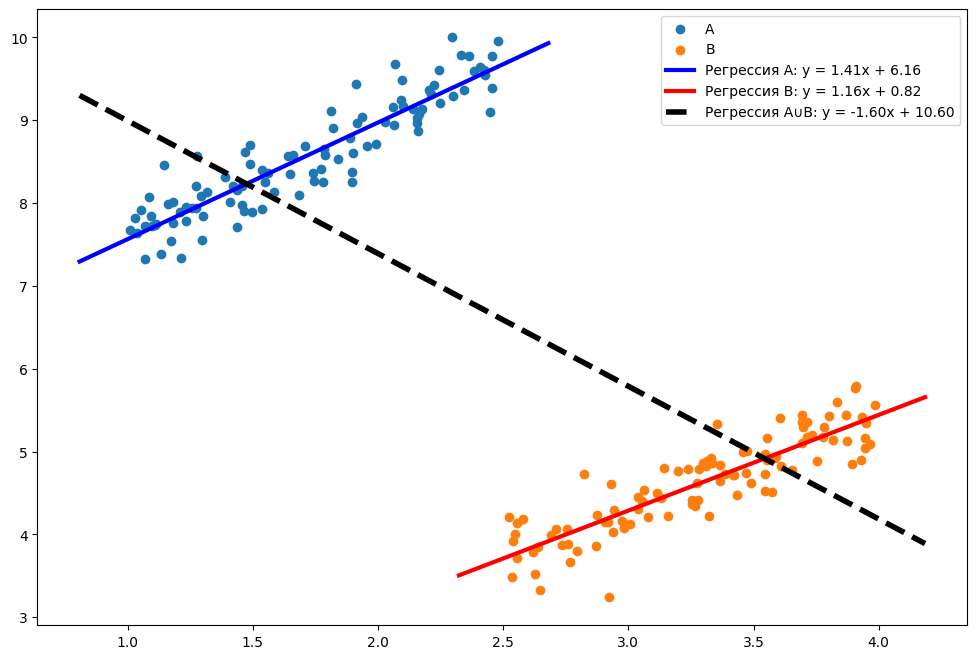

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Генерируем контрпример
np.random.seed(42)
n_points = 100
x_A = np.random.uniform(1, 2.5, n_points)
y_A = 1.5 * x_A + np.random.normal(0, 0.3, n_points) + 6
x_B = np.random.uniform(2.5, 4, n_points)
y_B = 1.1 * x_B + np.random.normal(0, 0.3, n_points) + 1

x_combined = np.concatenate([x_A, x_B])
y_combined = np.concatenate([y_A, y_B])

# Обучаем модели
first_regression = LinearRegression()
second_regression = LinearRegression()
combined_regression = LinearRegression()

X_A = x_A.reshape(-1, 1)
X_B = x_B.reshape(-1, 1)
X_combined = x_combined.reshape(-1, 1)

first_regression.fit(X_A, y_A)
second_regression.fit(X_B, y_B)
combined_regression.fit(X_combined, y_combined)

a_first_regression = first_regression.coef_[0]
b_first_regression = first_regression.intercept_

a_second_regression = second_regression.coef_[0]
b_second_regression = second_regression.intercept_

a_combined = combined_regression.coef_[0]
b_combined = combined_regression.intercept_

# Визуализация
plt.figure(figsize=(12, 8))
plt.scatter(x_A, y_A, label="A")
plt.scatter(x_B, y_B, label="B")

# Линии регрессии
x_range_A = np.linspace(min(x_A) - 0.2, max(x_A) + 0.2, 100)
x_range_B = np.linspace(min(x_B) - 0.2, max(x_B) + 0.2, 100)
x_range_combined = np.linspace(min(x_combined) - 0.2, max(x_combined) + 0.2, 100)

plt.plot(
    x_range_A,
    a_first_regression * x_range_A + b_first_regression,
    color="blue",
    linewidth=3,
    label=f"Регрессия A: y = {a_first_regression:.2f}x + {b_first_regression:.2f}",
)
plt.plot(
    x_range_B,
    a_second_regression * x_range_B + b_second_regression,
    color="red",
    linewidth=3,
    label=f"Регрессия B: y = {a_second_regression:.2f}x + {b_second_regression:.2f}",
)
plt.plot(
    x_range_combined,
    a_combined * x_range_combined + b_combined,
    color="black",
    linewidth=4,
    linestyle="--",
    label=f"Регрессия A∪B: y = {a_combined:.2f}x + {b_combined:.2f}",
)

plt.legend()
plt.show()